In [ ]:
import pandas as pd

file_link = "https://drive.google.com/file/d/14wnd5i6s2ksmj-rJthlnjBmPLHzchxBH/view?usp=sharing"

file_id = file_link.split("/")[-2]
csv_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(csv_url)
df.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


# EDA + Preprocessing

In [ ]:
print(df.columns)
print(df.shape)

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
(27901, 18)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


* only 3 null values are found at the "Financial Stress" Column. these values need to be replaced by the median of this column during preprocessing.
* Irrelevant column : id

In [ ]:
# Handle missing values
df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)

# Drop irrelevant columns
df = df.drop(columns=['id'])

df.isnull().sum()

/tmp/ipython-input-2557884253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)


,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


In [ ]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139852,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437270,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Depression'].value_counts()

,count
Depression,
1,16336
0,11565


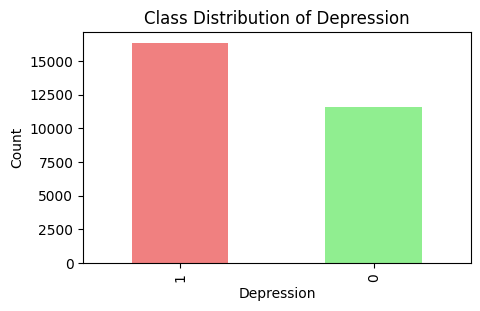

In [ ]:
#visual of the target variable
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
df['Depression'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Class Distribution of Depression')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Depression'].value_counts(normalize=True) * 100

,proportion
Depression,
1,58.549873
0,41.450127


* key finding: An imbalance in dataset is observed ~~~~~ SMOTE

Numeric features correlation


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.00,-0.08,0.00,0.01,0.01,-0.00,-0.03,-0.10,-0.23
Academic Pressure,-0.08,1.00,-0.02,-0.02,-0.11,-0.02,0.10,0.15,0.47
Work Pressure,0.00,-0.02,1.00,-0.05,-0.02,0.77,-0.01,0.00,-0.00
CGPA,0.01,-0.02,-0.05,1.00,-0.04,-0.05,0.00,0.01,0.02
Study Satisfaction,0.01,-0.11,-0.02,-0.04,1.00,-0.02,-0.04,-0.07,-0.17
Job Satisfaction,-0.00,-0.02,0.77,-0.05,-0.02,1.00,-0.01,0.01,-0.00
Work/Study Hours,-0.03,0.10,-0.01,0.00,-0.04,-0.01,1.00,0.08,0.21
Financial Stress,-0.10,0.15,0.00,0.01,-0.07,0.01,0.08,1.00,0.36
Depression,-0.23,0.47,-0.00,0.02,-0.17,-0.00,0.21,0.36,1.00


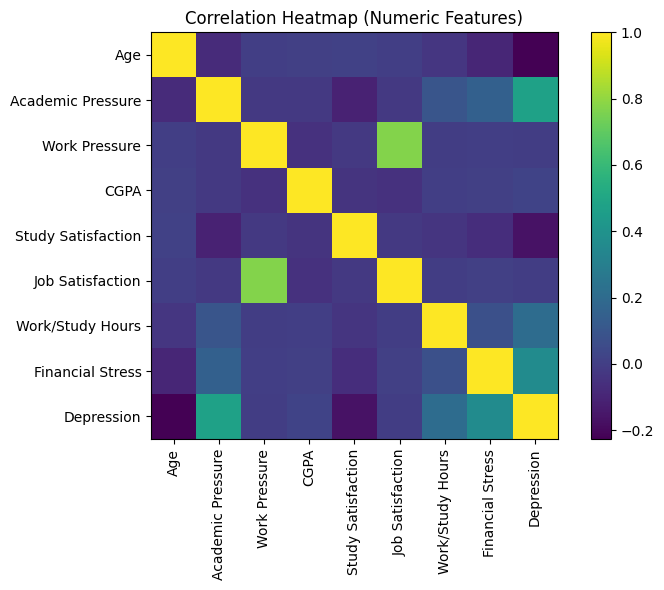

In [ ]:
#Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
if "id" in num_cols_all:
    num_cols_all = [c for c in num_cols_all if c.lower() != "id"]
if len(num_cols_all) >= 2:
    corr = df[num_cols_all].corr()
    print("Numeric features correlation")
    display(corr.round(2))

    plt.figure(figsize=(8, 6))
    plt.imshow(corr, interpolation='nearest')
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation.")


here, the Correlation heatmap shows no strong feature-target correlations


## Exploring categorical features: Gender, City, Sleep Duration, Degree, Profession, Dietary Habits, Have you ever had suicidal thoughts ?, Family History of Mental Illness


In [ ]:
print(df['Profession'].value_counts())

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64


since we are working on "Student Depression Prediction" & the number of non-student rows is significantly small, dropping all non-student rows & deleting the "profession" column.

In [ ]:
df = df[df['Profession'] == 'Student'].reset_index(drop=True)
# print(df['Profession'].value_counts())

df = df.drop(columns=['Profession'])

df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
# Gender, City, Sleep Duration, Degree, Dietary Habits, Have you ever had suicidal thoughts ?, Family History of Mental Illness

print(df[['Gender', 'City', 'Sleep Duration', 'Degree', "Dietary Habits", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]].head(10))

# unique values in each categorical column
for col in ['Gender', 'City', 'Sleep Duration', 'Degree', "Dietary Habits", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

   Gender           City     Sleep Duration    Degree Dietary Habits  \
0    Male  Visakhapatnam          5-6 hours   B.Pharm        Healthy   
1  Female      Bangalore          5-6 hours       BSc       Moderate   
2    Male       Srinagar  Less than 5 hours        BA        Healthy   
3  Female       Varanasi          7-8 hours       BCA       Moderate   
4  Female         Jaipur          5-6 hours    M.Tech       Moderate   
5    Male           Pune  Less than 5 hours       PhD        Healthy   
6    Male          Thane          7-8 hours       BSc        Healthy   
7  Female        Chennai  Less than 5 hours  Class 12      Unhealthy   
8    Male         Nagpur          7-8 hours      B.Ed       Moderate   
9    Male         Nashik  Less than 5 hours       LLB       Moderate   

  Have you ever had suicidal thoughts ? Family History of Mental Illness  
0                                   Yes                               No  
1                                    No                  

* key finding: The City column has messy data. Apart from real cities, it also contains degree names (M.Tech, ME, M.Com) and personal names (Bhavna, Vaanya) which clearly indicates mislabeled data. - needs fixing

In [ ]:
# cleaning City:

valid_cities = ['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
                'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
                'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
                'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
                'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
                'Faridabad', 'Delhi']

# Replacing invalid cities with 'Other':
df['City'] = df['City'].apply(lambda x: x if x in valid_cities else 'Other')

print(df['City'].unique())
print(df['City'].value_counts())


['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Other']
City
Kalyan           1564
Srinagar         1372
Hyderabad        1339
Vasai-Virar      1289
Lucknow          1155
Thane            1139
Ludhiana         1109
Agra             1092
Surat            1078
Kolkata          1066
Jaipur           1034
Patna            1006
Pune              968
Visakhapatnam     968
Ahmedabad         949
Bhopal            933
Chennai           884
Meerut            822
Rajkot            815
Delhi             767
Bangalore         766
Ghaziabad         744
Mumbai            698
Vadodara          693
Varanasi          685
Nagpur            651
Indore            643
Kanpur            607
Nashik            547
Faridabad         461
Other              26

# Handling categorical features:

* Gender = Label Encoding (0/1)

* City = One-Hot Encoding

* Sleep Duration = Ordinal Encoding

* Degree = Ordinal Encoding

* Dietary Habits =  Ordinal Encoding

* Have you ever had suicidal thoughts ? = Label Encoding (0/1)

* Family History of Mental Illness = Label Encoding (0/1)



In [ ]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])

print(df['Gender'].head(10))

0    1
1    0
2    1
3    0
4    0
5    1
6    1
7    0
8    1
9    1
Name: Gender, dtype: int64


In [ ]:
#City
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')

city_encoded = encoder.fit_transform(df[['City']])


city_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['City']))

df = pd.concat([df, city_df], axis=1)


In [ ]:
df.head()

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,1,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Sleep Duration
from sklearn.preprocessing import OrdinalEncoder

sleep_order = [['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours', 'Others']]

ordinal_encoder = OrdinalEncoder(categories=sleep_order)

df['Sleep Duration Encoded'] = ordinal_encoder.fit_transform(df[['Sleep Duration']])




here,
* Less than 5 hours = 0

* 5-6 hours = 1

* 7-8 hours = 2

* More than 8 hours = 3

* Others = 4



In [ ]:
df[['Sleep Duration', 'Sleep Duration Encoded']].head(10)

,Sleep Duration,Sleep Duration Encoded
0,5-6 hours,1.0
1,5-6 hours,1.0
2,Less than 5 hours,0.0
3,7-8 hours,2.0
4,5-6 hours,1.0
5,Less than 5 hours,0.0
6,7-8 hours,2.0
7,Less than 5 hours,0.0
8,7-8 hours,2.0
9,Less than 5 hours,0.0


In [ ]:
#Degree
degree_mapping = {
    "Class 12": 0,
    "BA": 1, "BSc": 1, "BCA": 1, "B.Ed": 1, "LLB": 1, "BE": 1,
    "BHM": 1, "B.Com": 1, "B.Arch": 1, "B.Tech": 1, "BBA": 1, "B.Pharm": 1,
    "Others": 1,
    "MA": 2, "M.Tech": 2, "M.Ed": 2, "MSc": 2, "M.Pharm": 2,
    "MCA": 2, "MBA": 2, "M.Com": 2, "ME": 2, "MHM": 2, "LLM": 2,
    "MD": 3, "MBBS": 3, "PhD": 3
}

df["Degree_encoded"] = df["Degree"].map(degree_mapping)

print(df[["Degree", "Degree_encoded"]].head(20))

      Degree  Degree_encoded
0    B.Pharm               1
1        BSc               1
2         BA               1
3        BCA               1
4     M.Tech               2
5        PhD               3
6        BSc               1
7   Class 12               0
8       B.Ed               1
9        LLB               1
10  Class 12               0
11        BE               1
12    M.Tech               2
13  Class 12               0
14  Class 12               0
15    M.Tech               2
16      M.Ed               2
17  Class 12               0
18  Class 12               0
19      B.Ed               1


here,

* 0 = Class 12

* 1 = Bachelor’s + Others

* 2 = Master’s

* 3 = Doctorate / Professional

In [ ]:
#Dietary Habits:

diet_mapping = {
    'Unhealthy': 0,
    'Others': 1,
    'Moderate': 2,
    'Healthy': 3
}

df['Dietary_Habits_encoded'] = df['Dietary Habits'].map(diet_mapping)


In [ ]:
df[["Dietary Habits","Dietary_Habits_encoded"]].head()

,Dietary Habits,Dietary_Habits_encoded
0,Healthy,3
1,Moderate,2
2,Healthy,3
3,Moderate,2
4,Moderate,2


In [ ]:
#Have you ever had suicidal thoughts ?

le_suicide = LabelEncoder()

df['Suicidal_Thoughts'] = le_suicide.fit_transform(df['Have you ever had suicidal thoughts ?'])

df = df.drop(columns=['Have you ever had suicidal thoughts ?'])

In [ ]:
df["Suicidal_Thoughts"].head(10)

,Suicidal_Thoughts
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,1
9,1


Here,
* yes = 1
* no = 0

In [ ]:
#Family History of Mental Illness

le_family = LabelEncoder()

df['Family_History'] = le_family.fit_transform(df['Family History of Mental Illness'])

df = df.drop(columns=['Family History of Mental Illness'])


In [ ]:
df['Family_History' ].head(10)

,Family_History
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,1
8,0
9,0


here,
* yes = 1
* no = 0

# Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop(columns=['City', 'Sleep Duration', 'Degree', 'Dietary Habits', 'Depression'])
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_res.value_counts())

Before SMOTE:
 Depression
1    13046
0     9250
Name: count, dtype: int64

After SMOTE:
 Depression
1    13046
0    13046
Name: count, dtype: int64


#models to work on :

* Decision Tree
* Random Forest
* AdaBoost
* Logistic Regression
* KNN
* Naive Bayes
* XGBoost

# Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
#without tuning:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train_res, y_train_res)

y_pred_default = dt_default.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_default))
print("Test F1 Score:", f1_score(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))

Test Accuracy: 0.7771797631862217
Test F1 Score: 0.8098591549295775
Confusion Matrix:
 [[1687  625]
 [ 617 2645]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      2312
           1       0.81      0.81      0.81      3262

    accuracy                           0.78      5574
   macro avg       0.77      0.77      0.77      5574
weighted avg       0.78      0.78      0.78      5574



In [ ]:
#With Hyperparameter Tuning:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
)

grid_search_dt.fit(X_train_res, y_train_res)

best_dt = grid_search_dt.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("Best Parameters:", grid_search_dt.best_params_)
print("CV Best F1 Score:", grid_search_dt.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Test F1 Score:", f1_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
CV Best F1 Score: 0.8416504833784009
Test Accuracy: 0.8171869393613204
Test F1 Score: 0.8459561602418745
Confusion Matrix:
 [[1757  555]
 [ 464 2798]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      2312
           1       0.83      0.86      0.85      3262

    accuracy                           0.82      5574
   macro avg       0.81      0.81      0.81      5574
weighted avg       0.82      0.82      0.82      5574



In [ ]:
#comparison:

print(f"#Without Tuning:\n Accuracy: {accuracy_score(y_test, y_pred_default):.4f}, F1: {f1_score(y_test, y_pred_default):.4f}")
print(f"#Tuned:\n Accuracy: {accuracy_score(y_test, y_pred_best):.4f}, F1: {f1_score(y_test, y_pred_best):.4f}")

#Without Tuning:
 Accuracy: 0.7772, F1: 0.8099
#Tuned:
 Accuracy: 0.8172, F1: 0.8460


# RandomForest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Without Tuning:
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_res, y_train_res)

y_pred_rf_default = rf_default.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_default))
print("Test F1 Score:", f1_score(y_test, y_pred_rf_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_default))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_default))

Test Accuracy: 0.844994617868676
Test F1 Score: 0.8684931506849315
Confusion Matrix:
 [[1857  455]
 [ 409 2853]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      2312
           1       0.86      0.87      0.87      3262

    accuracy                           0.84      5574
   macro avg       0.84      0.84      0.84      5574
weighted avg       0.84      0.84      0.84      5574



In [ ]:
#With Hyperparameter Tuning:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1'
)

grid_search_rf.fit(X_train_res, y_train_res)

best_rf = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)

print("Best Parameters:", grid_search_rf.best_params_)
print("CV Best F1 Score:", grid_search_rf.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Test F1 Score:", f1_score(y_test, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
CV Best F1 Score: 0.868196749876153
Test Accuracy: 0.8423035522066739
Test F1 Score: 0.8663117870722433
Confusion Matrix:
 [[1847  465]
 [ 414 2848]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      2312
           1       0.86      0.87      0.87      3262

    accuracy                           0.84      5574
   macro avg       0.84      0.84      0.84      5574
weighted avg       0.84      0.84      0.84      5574



In [ ]:
#Comparison:

print(f"#Without Tuning:\n Accuracy: {accuracy_score(y_test, y_pred_rf_default):.4f}, F1: {f1_score(y_test, y_pred_rf_default):.4f}")
print(f"#Tuned:\n Accuracy: {accuracy_score(y_test, y_pred_rf_best):.4f}, F1: {f1_score(y_test, y_pred_rf_best):.4f}")

#Without Tuning:
 Accuracy: 0.8450, F1: 0.8685
#Tuned:
 Accuracy: 0.8423, F1: 0.8663


# AdaBoost:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Without Tuning:

adb_default = AdaBoostClassifier(random_state=42)
adb_default.fit(X_train_res, y_train_res)

y_pred_default = adb_default.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_default))
print("Test F1 Score:", f1_score(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))

Test Accuracy: 0.8493003229278795
Test F1 Score: 0.8712051517939282
Confusion Matrix:
 [[1893  419]
 [ 421 2841]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      2312
           1       0.87      0.87      0.87      3262

    accuracy                           0.85      5574
   macro avg       0.84      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574



In [ ]:
#With Hyperparameter Tuning:
param_grid_adb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}


grid_search_adb = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=param_grid_adb,
    cv=5,
    scoring='f1'
)

grid_search_adb.fit(X_train_res, y_train_res)

best_adb = grid_search_adb.best_estimator_
y_pred_best = best_adb.predict(X_test)

print("Best Parameters:", grid_search_adb.best_params_)
print("CV Best F1 Score:", grid_search_adb.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Test F1 Score:", f1_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'learning_rate': 1, 'n_estimators': 200}
CV Best F1 Score: 0.8614264323981657
Test Accuracy: 0.8501973448152135
Test F1 Score: 0.8721482161996631
Confusion Matrix:
 [[1891  421]
 [ 414 2848]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      2312
           1       0.87      0.87      0.87      3262

    accuracy                           0.85      5574
   macro avg       0.85      0.85      0.85      5574
weighted avg       0.85      0.85      0.85      5574



In [ ]:
#Comparison:
print(f"#Without Tuning:\n Accuracy: {accuracy_score(y_test, y_pred_default):.4f}, F1: {f1_score(y_test, y_pred_default):.4f}")
print(f"#Tuned:\n Accuracy: {accuracy_score(y_test, y_pred_best):.4f}, F1: {f1_score(y_test, y_pred_best):.4f}")


#Without Tuning:
 Accuracy: 0.8493, F1: 0.8712
#Tuned:
 Accuracy: 0.8502, F1: 0.8721


# Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Without Tuning:
lr_default = LogisticRegression(random_state=42, max_iter=1000)
lr_default.fit(X_train_res, y_train_res)

y_pred_default = lr_default.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_default))
print("Test F1 Score:", f1_score(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))

Test Accuracy: 0.8460710441334769
Test F1 Score: 0.8672648514851485
Confusion Matrix:
 [[1913  399]
 [ 459 2803]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      2312
           1       0.88      0.86      0.87      3262

    accuracy                           0.85      5574
   macro avg       0.84      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574



In [ ]:
#With Hyperparameter Tuning:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid_lr,
    cv=5,
    scoring='f1'
)

grid_search_lr.fit(X_train_res, y_train_res)


best_lr = grid_search_lr.best_estimator_
y_pred_best = best_lr.predict(X_test)

print("Best Parameters:", grid_search_lr.best_params_)
print("CV Best F1 Score:", grid_search_lr.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Test F1 Score:", f1_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best Parameters: {'C': 1, 'solver': 'lbfgs'}
CV Best F1 Score: 0.8562668516142271
Test Accuracy: 0.8460710441334769
Test F1 Score: 0.8672648514851485
Confusion Matrix:
 [[1913  399]
 [ 459 2803]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      2312
           1       0.88      0.86      0.87      3262

    accuracy                           0.85      5574
   macro avg       0.84      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574



In [ ]:
# Comparison:
print(f"#Without Tuning:\n Accuracy: {accuracy_score(y_test, y_pred_default):.4f}, F1: {f1_score(y_test, y_pred_default):.4f}")
print(f"#Tuned:\n Accuracy: {accuracy_score(y_test, y_pred_best):.4f}, F1: {f1_score(y_test, y_pred_best):.4f}")


#Without Tuning:
 Accuracy: 0.8461, F1: 0.8673
#Tuned:
 Accuracy: 0.8461, F1: 0.8673


# KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Without Tuning:
knn_default = KNeighborsClassifier()
knn_default.fit(X_train_res, y_train_res)

y_pred_default = knn_default.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_default))
print("Test F1 Score:", f1_score(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))

Test Accuracy: 0.7863293864370291
Test F1 Score: 0.8125295136156147
Confusion Matrix:
 [[1802  510]
 [ 681 2581]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75      2312
           1       0.84      0.79      0.81      3262

    accuracy                           0.79      5574
   macro avg       0.78      0.79      0.78      5574
weighted avg       0.79      0.79      0.79      5574



In [ ]:
#With Hyperparameter Tuning:

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    scoring='f1'
)

grid_search_knn.fit(X_train_res, y_train_res)

# Best model from grid search
best_knn = grid_search_knn.best_estimator_
y_pred_best = best_knn.predict(X_test)

print("Best Parameters:", grid_search_knn.best_params_)
print("CV Best F1 Score:", grid_search_knn.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Test F1 Score:", f1_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
CV Best F1 Score: 0.831680978228334
Test Accuracy: 0.7961966271977037
Test F1 Score: 0.820480404551201
Confusion Matrix:
 [[1842  470]
 [ 666 2596]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76      2312
           1       0.85      0.80      0.82      3262

    accuracy                           0.80      5574
   macro avg       0.79      0.80      0.79      5574
weighted avg       0.80      0.80      0.80      5574



In [ ]:
# Comparison:
print(f"#Without Tuning:\n Accuracy: {accuracy_score(y_test, y_pred_default):.4f}, F1: {f1_score(y_test, y_pred_default):.4f}")
print(f"#Tuned:\n Accuracy: {accuracy_score(y_test, y_pred_best):.4f}, F1: {f1_score(y_test, y_pred_best):.4f}")


#Without Tuning:
 Accuracy: 0.7863, F1: 0.8125
#Tuned:
 Accuracy: 0.7962, F1: 0.8205


# Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Without Tuning:
nb_default = GaussianNB()
nb_default.fit(X_train_res, y_train_res)

y_pred_default = nb_default.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_default))
print("Test F1 Score:", f1_score(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))

Test Accuracy: 0.7820236813778256
Test F1 Score: 0.8154897494305239
Confusion Matrix:
 [[1674  638]
 [ 577 2685]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      2312
           1       0.81      0.82      0.82      3262

    accuracy                           0.78      5574
   macro avg       0.78      0.77      0.77      5574
weighted avg       0.78      0.78      0.78      5574



In [ ]:
#With Hyperparameter Tuning:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search_nb = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_nb,
    cv=5,
    scoring='f1',
)

grid_search_nb.fit(X_train_res, y_train_res)

best_nb = grid_search_nb.best_estimator_
y_pred_best = best_nb.predict(X_test)

print("Best Parameters:", grid_search_nb.best_params_)
print("CV Best F1 Score:", grid_search_nb.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Test F1 Score:", f1_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best Parameters: {'var_smoothing': 1e-05}
CV Best F1 Score: 0.7903799434165443
Test Accuracy: 0.7832795120200933
Test F1 Score: 0.815459822792545
Confusion Matrix:
 [[1697  615]
 [ 593 2669]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74      2312
           1       0.81      0.82      0.82      3262

    accuracy                           0.78      5574
   macro avg       0.78      0.78      0.78      5574
weighted avg       0.78      0.78      0.78      5574



In [ ]:
# Comparison:
print(f"#Without Tuning:\n Accuracy: {accuracy_score(y_test, y_pred_default):.4f}, F1: {f1_score(y_test, y_pred_default):.4f}")
print(f"#Tuned:\n Accuracy: {accuracy_score(y_test, y_pred_best):.4f}, F1: {f1_score(y_test, y_pred_best):.4f}")


#Without Tuning:
 Accuracy: 0.7820, F1: 0.8155
#Tuned:
 Accuracy: 0.7833, F1: 0.8155


# XGBoost:

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Without Tuning:
xgb_default = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_default.fit(X_train_res, y_train_res)

y_pred_default = xgb_default.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_default))
print("Test F1 Score:", f1_score(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:05:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.8415859346968066
Test F1 Score: 0.8663133989401968
Confusion Matrix:
 [[1830  482]
 [ 401 2861]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      2312
           1       0.86      0.88      0.87      3262

    accuracy                           0.84      5574
   macro avg       0.84      0.83      0.84      5574
weighted avg       0.84      0.84      0.84      5574



In [ ]:
#With Hyperparameter Tuning:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search_xgb.fit(X_train_res, y_train_res)

best_xgb = grid_search_xgb.best_estimator_
y_pred_best = best_xgb.predict(X_test)

print("Best Parameters:", grid_search_xgb.best_params_)
print("CV Best F1 Score:", grid_search_xgb.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Test F1 Score:", f1_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:07:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
CV Best F1 Score: 0.8688621181794389
Test Accuracy: 0.8442770003588087
Test F1 Score: 0.8682452944748027
Confusion Matrix:
 [[1846  466]
 [ 402 2860]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      2312
           1       0.86      0.88      0.87      3262

    accuracy                           0.84      5574
   macro avg       0.84      0.84      0.84      5574
weighted avg       0.84      0.84      0.84      5574



In [ ]:
# Comparison:
print(f"#Without Tuning:\n Accuracy: {accuracy_score(y_test, y_pred_default):.4f}, F1: {f1_score(y_test, y_pred_default):.4f}")
print(f"#Tuned:\n Accuracy: {accuracy_score(y_test, y_pred_best):.4f}, F1: {f1_score(y_test, y_pred_best):.4f}")


#Without Tuning:
 Accuracy: 0.8416, F1: 0.8663
#Tuned:
 Accuracy: 0.8443, F1: 0.8682
